#### Import Libraries

In [3]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [69]:
df.shape

(14999, 10)

In [6]:
#Attrition Analysis Using Logistic Regression 

left = df[df.left==1] #people that left
left.shape

(3571, 10)

In [7]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Exploratory Data Analysis

In [10]:
#attrition rate 

(3571/14999) * 100 # 23% people left the org

23.80825388359224

In [11]:
df.groupby("left")[df.select_dtypes(include='number').columns].mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


In [12]:
# Attrition Analysis

# 1. Satisfaction level is low for employee who left
# 2. Numbers of project handle by employees who left are high
# 3. Average monthly hours were 8% for employees who left
# 4. Promotion were low for employees who left

<Axes: xlabel='salary'>

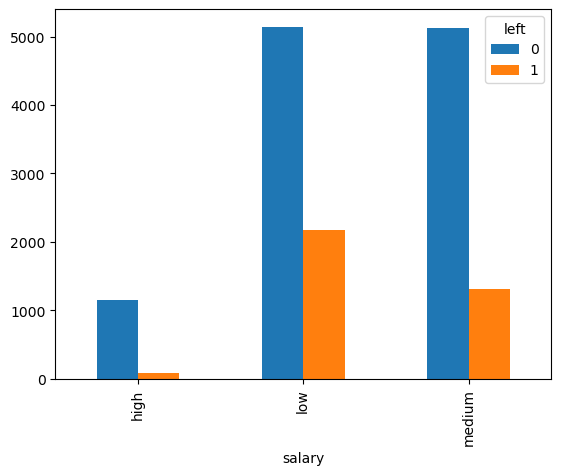

In [13]:
# Salary on retention 

pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='sales'>

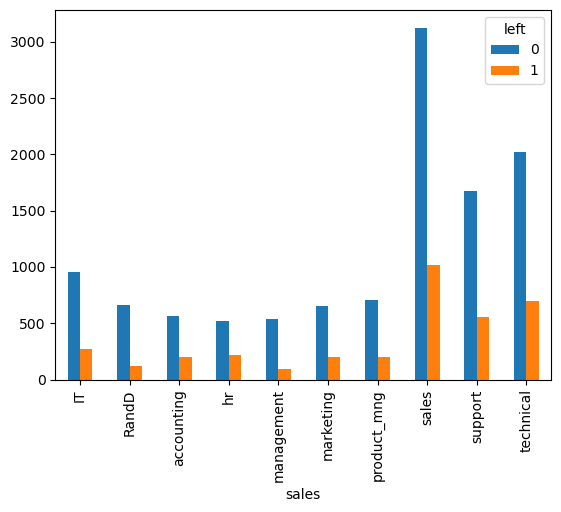

In [14]:
# Department to retention 

pd.crosstab(df.sales, df.left).plot(kind='bar')

<Axes: xlabel='sales'>

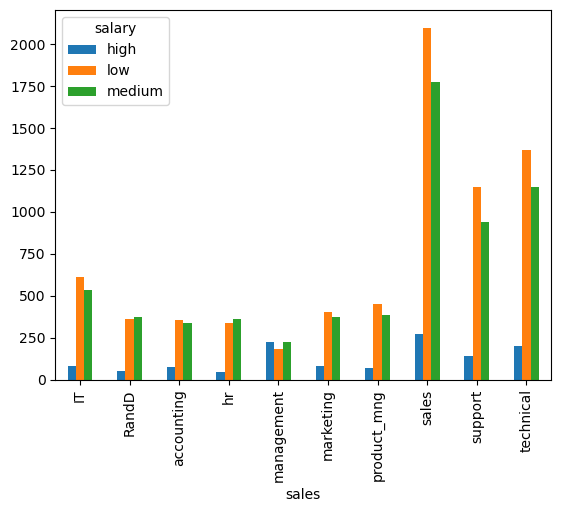

In [15]:
# Department to salary

pd.crosstab(df.sales, df.salary).plot(kind='bar')

#### Features Engineering 

In [17]:
sub_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
sub_df.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [18]:
# convert categorical variable of 'salary' using one hot encoding

salary_dummies = pd.get_dummies(sub_df.salary, dtype=int, prefix='salary')

In [19]:
df_with_dummies = pd.concat([sub_df, salary_dummies],axis= 'columns')

In [20]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [21]:
#dropping salary column

df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [22]:
# predicting variable

x = df_with_dummies
x.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [23]:
#target variable

y = df.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### Model building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
#Splitting data

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

C:\Users\Williams\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# testing the model

x_test[14:20]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11186,0.80,224,1,0,0,1
12673,0.37,149,0,0,1,0
14585,0.86,254,0,0,0,1
156,0.83,240,0,0,1,0
529,0.39,145,0,0,0,1
3146,0.76,183,0,0,0,1


In [30]:
y_test[14:20]

11186    0
12673    1
14585    1
156      1
529      1
3146     0
Name: left, dtype: int64

In [31]:
#predicting with the model
model.predict(x_test[14:20])

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
model.score(x_test, y_test)

0.7786666666666666

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2310
           1       0.54      0.26      0.35       690

    accuracy                           0.78      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.75      0.78      0.75      3000



In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

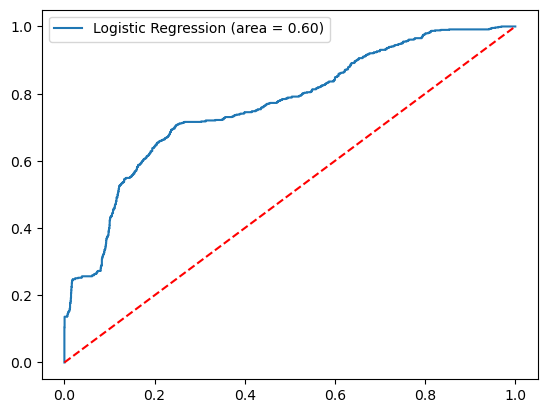

In [36]:
logit_roc_auc = roc_auc_score(y_test,model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc='best')